In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import tensorflow as tf
from tensorflow.python.keras import layers
import tensorflow_probability as tfp
from tensorflow.python.keras.callbacks import Callback
from sklearn.model_selection import train_test_split


import functions.parse_data as parse
import functions.models as md
import functions.handy_functions as hf

from sklearn.metrics import mean_squared_error

In [2]:

data_water=parse.parse('cloudrm_water.dat')
data_clear=parse.parse('cloudrm_clear.dat')
data_ice=parse.parse('cloudrm_ice.dat')
data_mixed=parse.parse('cloudrm_mixed.dat')

#Concatinate all datasets
data_all=pd.concat([data_water, data_clear, data_ice, data_mixed])
data_all=data_all.drop(columns=['Surface_Desc','Cloud_B01','Clear_B01'])

print(data_all.isnull().sum().sum())

0


In [3]:
##Train test validation split##
X_labels= ['Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
           'Cloud_B07','Cloud_B08','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12','Cloud_B13',
           'Sat_Zenith_Angle','Sun_Zenith_Angle','Azimuth_Diff_Angle']

#Leave out 'GOT', 'Water_Vapor'
#Band 1 no go.

y_labels=['Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
           'Clear_B07','Clear_B08','Clear_B09','Clear_B10','Clear_B11','Clear_B12','Clear_B13']

df=hf.normalise_input_df(data_all,X_labels)
df=hf.add_noise(df,X_labels,sigma=0.001)
num_epochs=20
batch_size=100
model11, history_df, X_test11,y_test11=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
model12, history_df, X_test12,y_test12=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
model13, history_df, X_test13,y_test13=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
model14, history_df, X_test14,y_test14=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
model15, history_df, X_test15,y_test15=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)

Epoch 1/20
1280/1280 [==============================] - 107s 83ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2/20
1280/1280 [==============================] - 105s 82ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3/20
1280/1280 [==============================] - 85s 66ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4/20
1280/1280 [==============================] - 88s 69ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 5/20
1280/1280 [==============================] - 73s 57ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 6/20
1280/1280 [==============================] - 79s 62ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 7/20
1280/1280 [==============================] - 76s 60ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8/20
1280/1280 [========================

In [4]:
#df['Diff_B02','Diff_B03','Diff_B04','Diff_B05','Diff_B06','Diff_B07','Diff_B08','Diff_B09','Diff_B10','Diff_B11', \
#   'Diff_B12','Diff_B13'] = \
#   df['Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06', 'Cloud_B07','Cloud_B08','Cloud_B09','Cloud_B10', \
#      'Cloud_B11','Cloud_B12','Cloud_B13'] - \
#   df['Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06', 'Clear_B07','Clear_B08','Clear_B09','Clear_B10', \
#      'Clear_B11','Clear_B12','Clear_B13']
cloudcols = ['Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
           'Cloud_B07','Cloud_B08','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12','Cloud_B13']
clearcols = ['Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
           'Clear_B07','Clear_B08','Clear_B09','Clear_B10','Clear_B11','Clear_B12','Clear_B13']
diffcols = ['Diff_B02','Diff_B03','Diff_B04','Diff_B05','Diff_B06',
            'Diff_B07','Diff_B08','Diff_B09','Diff_B10','Diff_B11','Diff_B12','Diff_B13']

data_all[diffcols] = data_all[cloudcols] - df[clearcols].values



In [5]:
y_labels2=['Diff_B02','Diff_B03','Diff_B04','Diff_B05','Diff_B06',
          'Diff_B07','Diff_B08','Diff_B09','Diff_B10','Diff_B11','Diff_B12','Diff_B13']

model21, history_df21, X_test21,y_test21=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels2,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
print('Training for network 1 complete')
model22, history_df22, X_test22,y_test22=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels2,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
print('Training for network 2 complete')
model23, history_df23, X_test23,y_test23=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels2,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
print('Training for network 3 complete')
model24, history_df24, X_test24,y_test24=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels2,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
print('Training for network 4 complete')
model25, history_df25, X_test25,y_test25=md.train_5layer_64neurons_model(df,x_labels=X_labels,y_labels=y_labels2,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)
print('Training for network 5 complete')

Epoch 1/20
1280/1280 [==============================] - 90s 70ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2/20
1280/1280 [==============================] - 111s 87ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 3/20
1280/1280 [==============================] - 77s 60ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4/20
1280/1280 [==============================] - 74s 58ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 5/20
1280/1280 [==============================] - 67s 52ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 6/20
1280/1280 [==============================] - 84s 65ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 7/20
1280/1280 [==============================] - 92s 72ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 8/20
1280/1280 [=========================

In [6]:
test_loss11, test_mse11 = model11.evaluate(X_test11, y_test11, verbose=2)
test_loss12, test_mse12 = model12.evaluate(X_test12, y_test12, verbose=2)
test_loss13, test_mse13 = model13.evaluate(X_test13, y_test13, verbose=2)
test_loss14, test_mse14 = model14.evaluate(X_test14, y_test14, verbose=2)
test_loss15, test_mse15 = model15.evaluate(X_test15, y_test15, verbose=2)
print(f"Test mse for ground net 1: {test_mse11}")
print(f"Test mse for ground net 2: {test_mse12}")
print(f"Test mse for ground net 3: {test_mse13}")
print(f"Test mse for ground net 4: {test_mse14}")
print(f"Test mse for ground net 5: {test_mse15}")

test_loss21, test_mse21 = model21.evaluate(X_test21, y_test21, verbose=2)
test_loss22, test_mse22 = model22.evaluate(X_test22, y_test22, verbose=2)
test_loss23, test_mse23 = model23.evaluate(X_test23, y_test23, verbose=2)
test_loss24, test_mse24 = model24.evaluate(X_test24, y_test24, verbose=2)
test_loss25, test_mse25 = model25.evaluate(X_test25, y_test25, verbose=2)
print(f"Test mse for cloud net 1: {test_mse21}")
print(f"Test mse for cloud net 2: {test_mse22}")
print(f"Test mse for cloud net 3: {test_mse23}")
print(f"Test mse for cloud net 4: {test_mse24}")
print(f"Test mse for cloud net 5: {test_mse25}")

1250/1250 - 15s - loss: 0.0035 - mse: 0.0035 - 15s/epoch - 12ms/step
1250/1250 - 14s - loss: 0.0035 - mse: 0.0035 - 14s/epoch - 11ms/step
1250/1250 - 14s - loss: 0.0033 - mse: 0.0033 - 14s/epoch - 11ms/step
1250/1250 - 14s - loss: 0.0037 - mse: 0.0037 - 14s/epoch - 11ms/step
1250/1250 - 14s - loss: 0.0036 - mse: 0.0036 - 14s/epoch - 12ms/step
Test mse for ground net 1: 0.0034926726948469877
Test mse for ground net 2: 0.0035335987340658903
Test mse for ground net 3: 0.003340390743687749
Test mse for ground net 4: 0.003707719501107931
Test mse for ground net 5: 0.0035614818334579468
1250/1250 - 14s - loss: 0.0042 - mse: 0.0042 - 14s/epoch - 11ms/step
1250/1250 - 14s - loss: 0.0042 - mse: 0.0042 - 14s/epoch - 11ms/step
1250/1250 - 14s - loss: 0.0043 - mse: 0.0043 - 14s/epoch - 11ms/step
1250/1250 - 14s - loss: 0.0042 - mse: 0.0042 - 14s/epoch - 11ms/step
1250/1250 - 14s - loss: 0.0044 - mse: 0.0044 - 14s/epoch - 11ms/step
Test mse for cloud net 1: 0.004230782855302095
Test mse for cloud n

In [9]:
y_predict11=model11.predict(X_test11)
y_predict12=model12.predict(X_test12)
y_predict13=model13.predict(X_test13)
y_predict14=model14.predict(X_test14)
y_predict15=model15.predict(X_test15)


1250/1250 [==============================] - 20s 16ms/step


In [11]:
MSE11 = mean_squared_error(y_test11, y_predict11, multioutput='raw_values')
MSE12 = mean_squared_error(y_test12, y_predict12, multioutput='raw_values')
MSE13 = mean_squared_error(y_test13, y_predict13, multioutput='raw_values')
MSE14 = mean_squared_error(y_test14, y_predict14, multioutput='raw_values')
MSE15 = mean_squared_error(y_test15, y_predict15, multioutput='raw_values')

MAXvals11 = np.max(y_test11,axis=0)
MAXvals12 = np.max(y_test12,axis=0)
MAXvals13 = np.max(y_test13,axis=0)
MAXvals14 = np.max(y_test14,axis=0)
MAXvals15 = np.max(y_test15,axis=0)

PSNR11 = 10*np.log10(np.divide(np.square(MAXvals11),MSE11))
PSNR12 = 10*np.log10(np.divide(np.square(MAXvals12),MSE12))
PSNR13 = 10*np.log10(np.divide(np.square(MAXvals13),MSE13))
PSNR14 = 10*np.log10(np.divide(np.square(MAXvals14),MSE14))
PSNR15 = 10*np.log10(np.divide(np.square(MAXvals15),MSE15))

print(PSNR11)




Clear_B02    32.926548
Clear_B03    33.859687
Clear_B04    34.877001
Clear_B05    34.194935
Clear_B06    35.286988
Clear_B07    37.291543
Clear_B08    37.433202
Clear_B09    36.878356
Clear_B10    36.144349
Clear_B11    38.638081
Clear_B12    30.815985
Clear_B13    27.940968
dtype: float64


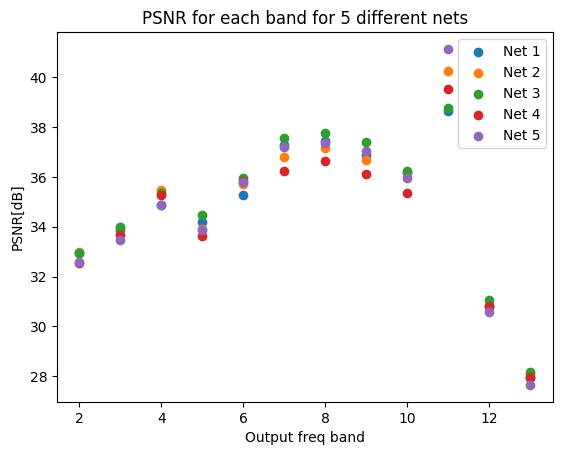

In [13]:
x = np.arange(2,14)

plt.figure()
plt.scatter(x,PSNR11)
plt.scatter(x,PSNR12)
plt.scatter(x,PSNR13)
plt.scatter(x,PSNR14)
plt.scatter(x,PSNR15)
plt.title('PSNR for each band for 5 different nets')
plt.xlabel('Output freq band')
plt.ylabel('PSNR[dB]')
plt.legend(['Net 1','Net 2','Net 3', 'Net 4', 'Net 5'])

plt.show()

In [15]:
#And now on the same X_test
y_predsame11=model11.predict(X_test11)
y_predsame12=model12.predict(X_test11)
y_predsame13=model13.predict(X_test11)
y_predsame14=model14.predict(X_test11)
y_predsame15=model15.predict(X_test11)

y_predmean = (y_predsame11+y_predsame12+y_predsame13+y_predsame14+y_predsame15)/5

1250/1250 [==============================] - 10s 8ms/step


In [16]:
MSEsame11 = mean_squared_error(y_test11, y_predsame11, multioutput='raw_values')
MSEsame12 = mean_squared_error(y_test11, y_predsame12, multioutput='raw_values')
MSEsame13 = mean_squared_error(y_test11, y_predsame13, multioutput='raw_values')
MSEsame14 = mean_squared_error(y_test11, y_predsame14, multioutput='raw_values')
MSEsame15 = mean_squared_error(y_test11, y_predsame15, multioutput='raw_values')

MSEmean = mean_squared_error(y_test11, y_predmean, multioutput='raw_values')

MAXvals = np.max(y_test11,axis=0)

PSNRsame11 = 10*np.log10(np.divide(np.square(MAXvals),MSE11))
PSNRsame12 = 10*np.log10(np.divide(np.square(MAXvals),MSE12))
PSNRsame13 = 10*np.log10(np.divide(np.square(MAXvals),MSE13))
PSNRsame14 = 10*np.log10(np.divide(np.square(MAXvals),MSE14))
PSNRsame15 = 10*np.log10(np.divide(np.square(MAXvals),MSE15))

PSNRmean = 10*np.log10(np.divide(np.square(MAXvals),MSEmean))

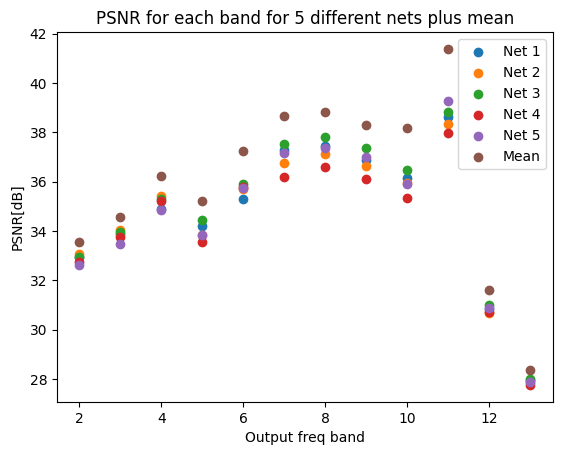

In [18]:

plt.figure()
plt.scatter(x,PSNRsame11)
plt.scatter(x,PSNRsame12)
plt.scatter(x,PSNRsame13)
plt.scatter(x,PSNRsame14)
plt.scatter(x,PSNRsame15)
plt.scatter(x,PSNRmean)
plt.title('PSNR for each band for 5 different nets plus mean')
plt.xlabel('Output freq band')
plt.ylabel('PSNR[dB]')
plt.legend(['Net 1','Net 2','Net 3', 'Net 4', 'Net 5','Mean'])

plt.show()